Морфологический анализ <br/>
Домашнее задание 12 <br/>
**Голев Александр 135М**

## 1. Построить **разделяющую формы** V(i) и V(j) изображений цифр 
(выбрать пару цифр по своему усмотрению и использовать все 100 изображений этих цифр), соответственно, **гиперплоскость** и соответствующее ей **изображение w**.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from itertools import product

import func as f
#import mosaic_approx as ma
import noise_gen as ns
#import last_finder as find
#import old_finder as old_find

In [2]:
# Загружаем изображение
samples_bin = {k: [] for k in range(10)}
samples = {k: [] for k in range(10)}
for k in range(10):
    for i in range(100):
        i_r = '{:0>2}'.format(i)
        img = cv2.cvtColor(cv2.imread(f'samples/{k}_{i_r}.png'), cv2.COLOR_BGR2GRAY) 
        #бинаризация
        _, img_bin = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        samples[k].append(img)
        samples_bin[k].append(img_bin)

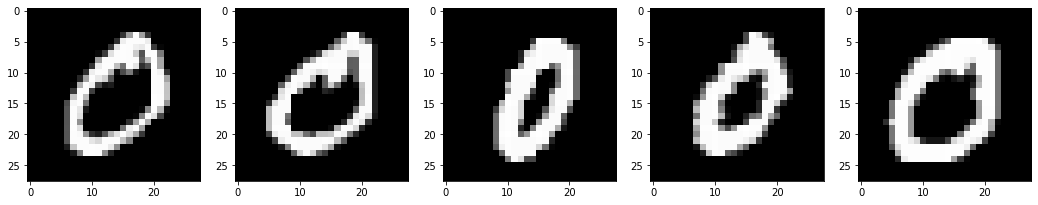

In [3]:
f.showOneLine(samples[0][0:5], dim = 5)

In [4]:
# цифры для построения разделяющей гиперплоскости
O_1 = 2
O_2 = 6

In [5]:
# функция, строющая разделяющую гиперплоскость
def build_w(o1, o2):
    o1_samples = np.array(samples_bin[o1])
    o2_samples = np.array(samples_bin[o2])
    # нормировка
    o1_samples = o1_samples/np.linalg.norm(o1_samples, axis=(1,2))[:, np.newaxis, np.newaxis]
    o2_samples = o2_samples/np.linalg.norm(o2_samples, axis=(1,2))[:, np.newaxis, np.newaxis]
    
    # разделяющие формы V(i) и V (j) изображений первой цифры и второй цифры
    e1 = np.sum(o1_samples, axis=0)/100
    e2 = np.sum(o2_samples, axis=0)/100
    
    w = np.array(e2 - e1)
    return w, e1, e2

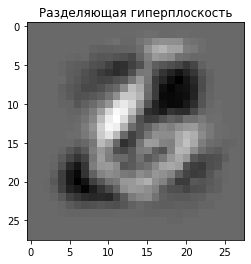

In [6]:
plt.title('Разделяющая гиперплоскость')
w, e1,e2 = build_w(O_1, O_2)
plt.imshow(w, cmap='gray')

# 2. Исследовать помехозащищенность классификации зашумленных изображений g по значению (g, w),
построив графики частот неверной классификации изображения как изображения цифры i
и неверной классификации изображения как изображения цифры j как функций
дисперсии погрешности σ. 

**Для генерации шума использовать:**

II. дискретное равномерное распределение с двумя равновероятными значениями
отклонений, σ и −σ,

а в анализируемой выборке взять одинаковое число изображений каждой цифры
(например, по 100).

In [7]:
sigmas = np.linspace(0,255,36).astype(int)
N = 100

In [8]:
def correct_prediction(o_i, img, digits):
    pred = np.sum(img*w)
    return (pred < 0 and o_i == digits[0]) or (pred > 0 and o_i == digits[1])

In [9]:
errors = []
digits = [O_1, O_2]
for sigma in sigmas:
    error = 0
    #по каждой цифре
    for digit in digits:
        # выборка 100 для каждой цифры
        for i in range(N):
            sample = samples_bin[digit][i].copy()
            noise = ns.addNoise(sample.copy(),sigma)
            if not correct_prediction(digit, noise, digits):
               error += 1
    errors.append(error/(2*N))

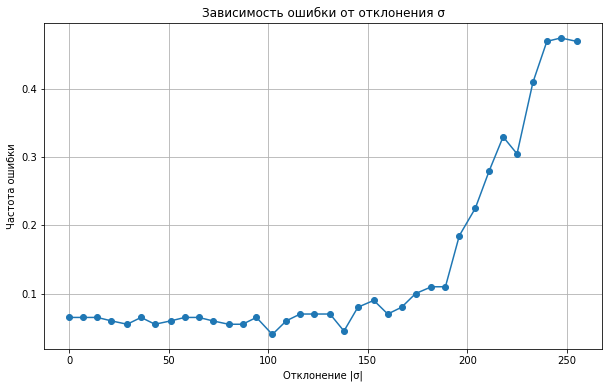

In [10]:
errors = np.array(errors)
plt.figure(figsize=(10, 6))
plt.plot(sigmas, errors, marker='o', linestyle='-')
plt.xlabel('Отклонение |σ|')
plt.ylabel('Частота ошибки')
plt.title('Зависимость ошибки от отклонения σ')
plt.grid(True)
plt.show()

-2.470507575008611


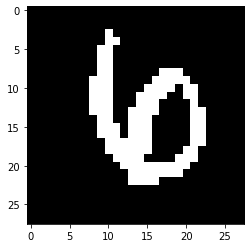

In [76]:
for i in range(100):
    sample = samples_bin[6][i].copy()
    noise = ns.addNoise(sample.copy(),0)
    pred = np.sum(noise*w)
    if pred < 0: 
       plt.imshow(noise, cmap='gray')
       print(pred)
       break 
    
  